# Numpy

#### Импорт библиотеки

In [59]:
import numpy as np

### 1. Получить датасет Ирис

In [60]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = np.genfromtxt(url, delimiter=",", dtype=str)
#iris = np.genfromtxt('iris.csv', delimiter=',', dtype=float, skip_header=1)
print(iris[:10])

[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']
 ['5.4' '3.9' '1.7' '0.4' 'Iris-setosa']
 ['4.6' '3.4' '1.4' '0.3' 'Iris-setosa']
 ['5.0' '3.4' '1.5' '0.2' 'Iris-setosa']
 ['4.4' '2.9' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.1' '1.5' '0.1' 'Iris-setosa']]


### 2. Представить датасет одномерный/двумерный массивы (признаки поместить в матрицу (n, 4), названия самого ириса --- вектор размера n). Отобразить сколько места он занимает

In [61]:
features = iris[:, :4].astype(float)
names = iris[:, 4]
print("Размер матрицы признаков = ", features.shape)
print("Размер вектора названий = ", names.shape)
print(f"Матрица признаков занимает {features.nbytes} байт")
print(f"Вектор названий ириса занимает {names.nbytes} байт")

Размер матрицы признаков =  (150, 4)
Размер вектора названий =  (150,)
Матрица признаков занимает 4800 байт
Вектор названий ириса занимает 9000 байт


### 3. Нормализовать данные на промежуток от 0 до 1 для каждой колонки

In [62]:
f_min = features.min(axis=0)
f_max = features.max(axis=0)
f_normal = (features - f_min) / (f_max - f_min)
print(f"Матрица признаков\n{f_normal[:5]}")

Матрица признаков
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


### 4. Представить один из признаков в виде категориальной переменной и разделить её на три типа используя квантили.

In [63]:
f1 = f_normal[:, 0]
quantiles = np.quantile(f1, [0.25, 0.75])
categories = np.where(f1 < quantiles[0], 'small',
                      np.where(f1 <= quantiles[1], 'medium', 'big'))

print(categories[:10])

['medium' 'small' 'small' 'small' 'small' 'medium' 'small' 'small' 'small'
 'small']


### 5. Разделить датасет на две случайные выборки (0.8 / 0.2)

In [64]:
np.random.seed(42)
indices = np.random.permutation(len(f_normal))
split_index = int(len(f_normal) * 0.8)

f_train = f_normal[indices[:split_index]]
names_train = names[indices[:split_index]]

f_test = f_normal[indices[split_index:]]
names_test = names[indices[split_index:]]

print(f'Длина тренировочной датасета: {names_train.shape[0]}')
print(f'Длина тестового датасета: {names_test.shape[0]}')

Длина тренировочной датасета: 120
Длина тестового датасета: 30


### 6. Выбрать один из методов классификации (к примеру, SVC), обучить на тренировочном датасете, оценить результат на тестовом и сделать выводы

#### Импорт библиотек

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#### Обучение

In [66]:
model = SVC()
model.fit(f_train, names_train)

SVC()

#### Оценка

In [67]:
names_predict = model.predict(f_test)
accuracy = accuracy_score(names_test, names_predict)
print(f"Точность модели: {accuracy}")

Точность модели: 0.9666666666666667


#### Вывод
Точность равна почти 97%. Следовательно, можно сказать, что модель хорошо обучилась, её можно использовать.

### 7. Проведите три эксперимента изменяя гиперпараметры модели или условия препроцессинга данных (например, нормализованные или нет данные), сделайте выводы

#### **Эксперимент 1.** Изменение параметра регуляризации C

In [68]:
models = {
    'C=0.01': SVC(C=0.01),
    'C=1.0': SVC(C=1.0),
    'C=10.0': SVC(C=10.0)
}

results = {}
for name, clf in models.items():
    clf.fit(f_train, names_train)
    names_predict = clf.predict(f_test)
    results[name] = accuracy_score(names_test, names_predict)

print(results)

{'C=0.01': 0.23333333333333334, 'C=1.0': 0.9666666666666667, 'C=10.0': 1.0}


#### Вывод
Изменение параметра C приводит к изменению точности модели в ту же сторону.

#### **Эксперимент 2.** Использование ненормализованных данных


In [69]:
f_train_orig = f_train * (f_max - f_min) + f_min
f_test_orig = f_test * (f_max - f_min) + f_min

model_orig = SVC()
model_orig.fit(f_train_orig, names_train)

names_predict_orig = model_orig.predict(f_test_orig)

accuracy_orig = accuracy_score(names_test, names_predict_orig)
print(accuracy_orig)

0.9666666666666667


#### Вывод
Точность модели не меняется. Это значит, что нормализация не влияет на неё.

#### **Эксперимент 3.** Использование другого метода классификации (K-ближайших соседей (KNN))

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(f_train, names_train)

names_predict_knn = knn_model.predict(f_test)
accuracy_knn = accuracy_score(names_test, names_predict_knn)

print(f"Точность модели KNN: {accuracy_knn}")

Точность модели KNN: 0.9333333333333333


#### Вывод
Использование разных методов классификации может привести к различным результатам.

### 8. Пользуясь методами уменьшения размерности (PCA, t-sne) визуализировать датасет

#### Импорт библиотек

In [71]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Создание графика

In [72]:
def create_plot(data, labels, title):
    fig, ax = plt.subplots(figsize=(5, 5))
    colors = ['blue', 'green', 'red']
    for label, color in zip(np.unique(labels), colors):
        idx = np.where(labels == label)[0]
        ax.scatter(data[idx, 0], data[idx, 1], c=color, label=label)
    ax.legend()
    ax.set_title(title)
    plt.show()


*   PCA

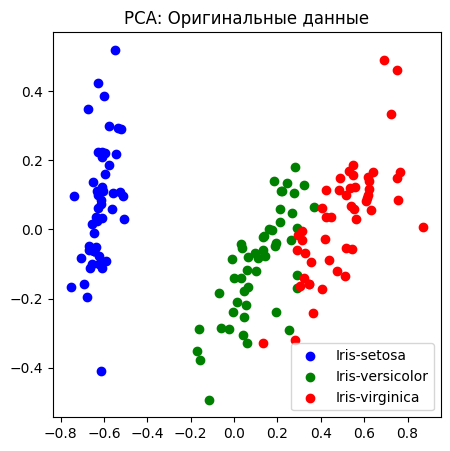

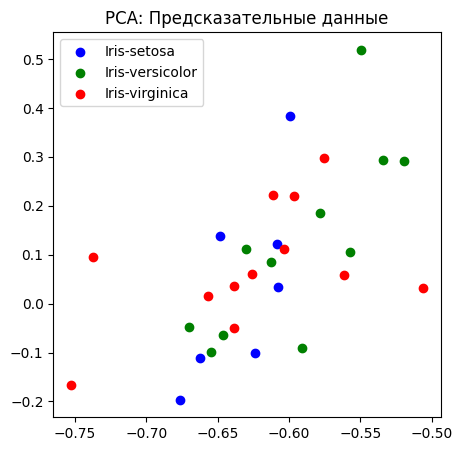

In [73]:
pca = PCA(n_components=2)
f_pca = pca.fit_transform(f_normal)

create_plot(f_pca, names, 'PCA: Оригинальные данные')
names_pred = model.predict(f_normal)
create_plot(f_pca, names_predict, 'PCA: Предсказательные данные')

*   t-sne

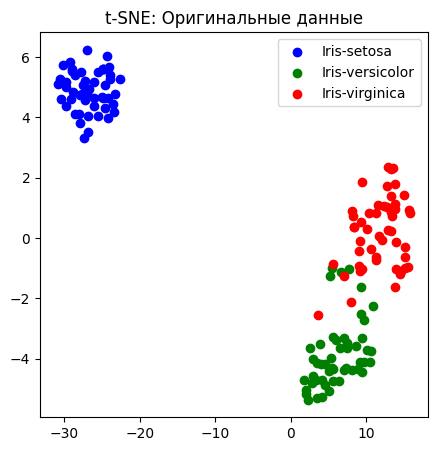

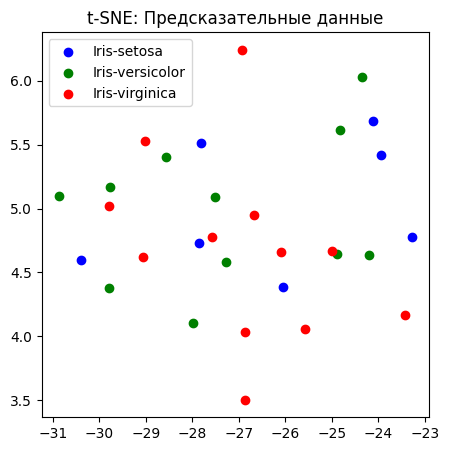

In [74]:
tsne = TSNE(n_components=2, random_state=42)
f_tsne = tsne.fit_transform(f_normal)

create_plot(f_tsne, names, 't-SNE: Оригинальные данные')
create_plot(f_tsne, names_predict, 't-SNE: Предсказательные данные')